# Load Modules

In [26]:
import subprocess
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

## load data function

In [2]:
def load_data(file_pairs,src_dir='',dst_dir='.'):
    import os
    if not os.path.isdir(dst_dir):
        os.mkdir(dst_dir)
    for file_pair in file_pairs:
        src = os.path.abspath(os.path.expanduser(os.path.join(src_dir,file_pair[0])))
        dst = os.path.expanduser(os.path.join(dst_dir,file_pair[1]))
        if os.path.isfile(dst):
            os.remove(dst)
        if not os.path.islink(dst):
            os.symlink(src,dst)

def load_data_suffixes(file_pairs, src_dir='', dst_dir='.', suffixes=None):
    import os
    if not os.path.isdir(dst_dir):
        os.mkdir(dst_dir)
    if not suffixes:
        for file_pair in file_pairs:
            src = os.path.abspath(os.path.expanduser(os.path.join(src_dir, file_pair[0])))
            dst = os.path.expanduser(os.path.join(dst_dir, file_pair[1]))
            if os.path.isfile(dst):
                os.remove(dst)
            if not os.path.islink(dst):
                os.symlink(src, dst)
    else:
        for file_pair in file_pairs:
            for suffix_pair in suffixes:
                src = os.path.abspath(os.path.expanduser(
                    os.path.join(src_dir, file_pair[0] + suffix_pair[0])))
                dst = os.path.expanduser(
                    os.path.join(dst_dir, file_pair[1] + suffix_pair[1]))
                if os.path.isfile(dst):
                    os.remove(dst)
                if not os.path.islink(dst):
                    os.symlink(src, dst)

# load data

In [5]:
import subprocess
import os
os.chdir("/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/comparison/peak_signal_heatmap/")
# load samples
samples = [
    'ATF1_1e5', 
    'ELF1_1e5', 
    'ATF1_FlagCR_1e5', 'ATF1_wtCR_1e5',
    'ELF1_FlagCR_1e5', 'ELF1_wtCR_1e5',
]

for sample in samples:
    file_pairs = [
        [f'{sample}_excludeIgG_filtered_peaks.narrowPeak', f'{sample}_excludeIgG_filtered_peaks.narrowPeak'],
    ]
    load_data_suffixes(file_pairs, src_dir='/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/sampling_down', dst_dir='.')
    

In [4]:
import subprocess
import os
os.chdir("/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/comparison/peak_signal_heatmap/")
# load samples
samples = [
    'ATF1_ChIP', 
    'ELF1_ChIP', 
]

for sample in samples:
    file_pairs = [
        [f'{sample}_filtered_peaks.narrowPeak', f'{sample}_filtered_peaks.narrowPeak'],
    ]
    load_data_suffixes(file_pairs, src_dir='/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/sampling_down', dst_dir='.')


In [11]:
import subprocess
import os
os.chdir("/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/comparison/peak_signal_heatmap/")
# load samples
samples = [
    'IgG_public_GSE120011', 
]

for sample in samples:
    file_pairs = [
        [f'{sample}_filtered_peaks.narrowPeak', f'{sample}_filtered_peaks.narrowPeak'],
    ]
    load_data_suffixes(file_pairs, src_dir='/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/sampling_down', dst_dir='.')


In [17]:
import subprocess
import os
os.chdir("/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/comparison/peak_signal_heatmap/")
# load samples
samples = [
    'ATF1_1e5',  
    'ELF1_1e5', 
    'ATF1_FlagCR_1e5', 'ATF1_wtCR_1e5',
    'ELF1_FlagCR_1e5', 'ELF1_wtCR_1e5',
    'ATF1_ChIP', 
    'ELF1_ChIP', 
    'IgG_public_GSE120011'
]

for sample in samples:
    file_pairs = [
        [f'{sample}.bw', f'{sample}.bw'],
    ]
    load_data_suffixes(file_pairs, src_dir='/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/sampling_down/before_filter', dst_dir='.')    

# heatmap

In [36]:
import os
os.chdir('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/comparison/peak_signal_heatmap')

In [37]:
%%bash
for TF in ATF1 ELF1;do
    for sample in 1e5_excludeIgG FlagCR_1e5_excludeIgG wtCR_1e5_excludeIgG ChIP;do
        awk 'BEGIN{FS=OFS="\t"}{print $1, $2+$10, $2+$10+1, $4, $9}' ${TF}_${sample}_filtered_peaks.narrowPeak > ${TF}_${sample}_filtered_summits.bed
    done
done

# IgG
awk 'BEGIN{FS=OFS="\t"}{print $1, $2+$10, $2+$10+1, $4, $9}' IgG_public_GSE120011_filtered_peaks.narrowPeak > IgG_public_GSE120011_filtered_summits.bed


## peak signal prepare !! not used

In [15]:
%%bash
function extend_summit_2k {
    input_summit_bed=$1
    output_summit_2k_bed=${input_summit_bed%bed}2k.bed
    awk 'BEGIN{FS=OFS="\t"}{print $1, $2-2000, $3+1999, $4}' ${input_summit_bed} > ${output_summit_2k_bed}
    ~/bin/utilities/replace_slop_bed.sh ~/source/bySpecies/hg38/chromSizes/hg38.chrom.sizes ${output_summit_2k_bed}
}

for TF in ATF1 ELF1;do
    for sample in 1e5_excludeIgG FlagCR_1e5_excludeIgG wtCR_1e5_excludeIgG ChIP;do
        extend_summit_2k ${TF}_${sample}_filtered_summits.bed
    done
done

# IgG
extend_summit_2k IgG_public_GSE120011_filtered_summits.bed


Replacing for ATF1_1e5_excludeIgG_filtered_summits.2k.bed is done!
Replacing for all files are done!
Replacing for ATF1_FlagCR_1e5_excludeIgG_filtered_summits.2k.bed is done!
Replacing for all files are done!
Replacing for ATF1_wtCR_1e5_excludeIgG_filtered_summits.2k.bed is done!
Replacing for all files are done!
Replacing for ATF1_ChIP_filtered_summits.2k.bed is done!
Replacing for all files are done!
Replacing for ELF1_1e5_excludeIgG_filtered_summits.2k.bed is done!
Replacing for all files are done!
Replacing for ELF1_FlagCR_1e5_excludeIgG_filtered_summits.2k.bed is done!
Replacing for all files are done!
Replacing for ELF1_wtCR_1e5_excludeIgG_filtered_summits.2k.bed is done!
Replacing for all files are done!
Replacing for ELF1_ChIP_filtered_summits.2k.bed is done!
Replacing for all files are done!
Replacing for IgG_public_GSE120011_filtered_summits.2k.bed is done!
Replacing for all files are done!


In [5]:
heatmap_signal = {}
heatmap_signal['FitCUTRUN_peak'] = {}
heatmap_signal['CUTRUN_peak'] = {}
heatmap_signal['Flag-CUTRUN_peak'] = {}
heatmap_signal['ChIP-seq_peak'] = {}
heatmap_signal['IgG_peak'] = {}

### ATF1

#### FitCUT&RUN as peak

In [27]:
%%bash
pwd

/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/comparison/peak_signal_heatmap


In [59]:
bw_scan = False

import subprocess

name = 'around_ATF1_FitCUTRUN_peak_signal'
capture_regions_file = 'ATF1_1e5_excludeIgG_filtered_summits.bed'
resolution = 20
span = 2000
capture_points = int(2 * span / resolution + 1)
xticks = np.arange(-span,span+resolution,resolution)
bigwig_files = [
    'ATF1_1e5.bw',
    'ATF1_wtCR_1e5.bw',
    'ATF1_FlagCR_1e5.bw',
    'ATF1_ChIP.bw',
    'IgG_public_GSE120011.bw',
]
labels = [
    'FitCUT&RUN v.s. FitCUT&RUN', 
    'FitCUT&RUN v.s. CUT&RUN', 
    'FitCUT&RUN v.s. Flag-CUT&RUN', 
    'FitCUT&RUN v.s. ChIP-seq', 
    'FitCUT&RUN v.s. IgG control',
] ### peak v.s. signal

cmd = f'''awk '{{print $1"\\t"$2-{span}-{resolution >> 1}"\\t"$3+{span}+{resolution >> 1}"\\t"$4"\\t"$5"\\t"$6}}' {capture_regions_file} > capture_regions.bed '''
print(subprocess.check_output(cmd, shell=True).decode(),end='')

capture_regions_file = 'capture_regions.bed'
bw_scan_cmd = f'/mnt/Storage/home/wangyiman/bin/utilities/getBigWigValue.py -n {name} -p 8 -s {capture_points} -m speed -b {capture_regions_file}'

for bigwig_file in bigwig_files:
    bw_scan_cmd += f' -w {bigwig_file}'
    
if bw_scan:
    print(subprocess.check_output(bw_scan_cmd.split()).decode(),end='')
    
def get_bigwig_mean(bw_file):
    import subprocess
    fold = subprocess.check_output(f'bigWigInfo {bw_file} | grep mean', shell=True).decode()
    fold = float(fold.split()[1])
    return fold

for index, (bigwig_file, label) in enumerate(zip(bigwig_files, labels)):
    mean = get_bigwig_mean(bigwig_file)
    heatmap_signal['_'.join(name.split('_')[2:4])][label] = pd.read_csv(f'signal_{name}_siteprof{index+1}.gz',sep='\t',header=None,index_col=None,names=xticks)/ mean
    
heatmap_signal['_'.join(name.split('_')[2:4])][labels[0]].head()

,-2000,-1980,-1960,-1940,-1920,-1900,-1880,-1860,-1840,-1820,...,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,2.036067,6.786892,6.786892,0.0,0.0,1.696721,6.786892,6.786892,0.000000,0.00000
3,0.0,0.000000,0.000000,3.732788,6.786892,5.090170,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.0,6.447546,8.144254,9.162311,6.786892,4.411479,6.786892,4.750825,0.0,0.0,...,6.786892,6.786892,1.357376,0.0,0.0,0.000000,5.768855,6.786892,3.054104,2.58548


#### CUT&RUN as peak

In [60]:
bw_scan = False

import subprocess

name = 'around_ATF1_CUTRUN_peak_signal'
capture_regions_file = 'ATF1_wtCR_1e5_excludeIgG_filtered_summits.bed'
resolution = 20
span = 2000
capture_points = int(2 * span / resolution + 1)
xticks = np.arange(-span,span+resolution,resolution)
bigwig_files = [
    'ATF1_1e5.bw',
    'ATF1_wtCR_1e5.bw',
    'ATF1_FlagCR_1e5.bw',
    'ATF1_ChIP.bw',
    'IgG_public_GSE120011.bw',
]
labels = [
    'CUT&RUN v.s. FitCUT&RUN', 
    'CUT&RUN v.s. CUT&RUN', 
    'CUT&RUN v.s. Flag-CUT&RUN', 
    'CUT&RUN v.s. ChIP-seq', 
    'CUT&RUN v.s. IgG control',
] ### peak v.s. signal

cmd = f'''awk '{{print $1"\\t"$2-{span}-{resolution >> 1}"\\t"$3+{span}+{resolution >> 1}"\\t"$4"\\t"$5"\\t"$6}}' {capture_regions_file} > capture_regions.bed '''
print(subprocess.check_output(cmd, shell=True).decode(),end='')

capture_regions_file = 'capture_regions.bed'
bw_scan_cmd = f'/mnt/Storage/home/wangyiman/bin/utilities/getBigWigValue.py -n {name} -p 8 -s {capture_points} -m speed -b {capture_regions_file}'

for bigwig_file in bigwig_files:
    bw_scan_cmd += f' -w {bigwig_file}'
    
if bw_scan:
    print(subprocess.check_output(bw_scan_cmd.split()).decode(),end='')
    
def get_bigwig_mean(bw_file):
    import subprocess
    fold = subprocess.check_output(f'bigWigInfo {bw_file} | grep mean', shell=True).decode()
    fold = float(fold.split()[1])
    return fold

for index, (bigwig_file, label) in enumerate(zip(bigwig_files, labels)):
    mean = get_bigwig_mean(bigwig_file)
    heatmap_signal['_'.join(name.split('_')[2:4])][label] = pd.read_csv(f'signal_{name}_siteprof{index+1}.gz',sep='\t',header=None,index_col=None,names=xticks)/ mean
    
heatmap_signal['_'.join(name.split('_')[2:4])][labels[0]].head()

,-2000,-1980,-1960,-1940,-1920,-1900,-1880,-1860,-1840,-1820,...,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000
0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,6.786892,6.786892,...,0.000000,5.090170,6.786892,3.732788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0,0.0,0.0,0.339345,6.786892,6.786892,1.357376,0.000000,0.000000,...,3.393449,6.786892,5.090170,0.000000,0.339345,6.786892,6.786892,5.768855,6.786892,4.201412
3,0.339345,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.681963,38.685290,34.613129,5.429509,0.000000,0.000000,0.000000,0.000000,1.696721,6.786892
4,0.000000,0.0,0.0,0.0,0.000000,0.000000,3.393449,6.786892,5.090170,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.411479,6.786892,4.072134,0.000000


#### Flag-CUT&RUN as peak

In [61]:
bw_scan = False

import subprocess

name = 'around_ATF1_Flag-CUTRUN_peak_signal'
capture_regions_file = 'ATF1_FlagCR_1e5_excludeIgG_filtered_summits.bed'
resolution = 20
span = 2000
capture_points = int(2 * span / resolution + 1)
xticks = np.arange(-span,span+resolution,resolution)
bigwig_files = [
    'ATF1_1e5.bw',
    'ATF1_wtCR_1e5.bw',
    'ATF1_FlagCR_1e5.bw',
    'ATF1_ChIP.bw',
    'IgG_public_GSE120011.bw',
]
labels = [
    'Flag-CUT&RUN v.s. FitCUT&RUN', 
    'Flag-CUT&RUN v.s. CUT&RUN', 
    'Flag-CUT&RUN v.s. Flag-CUT&RUN', 
    'Flag-CUT&RUN v.s. ChIP-seq', 
    'Flag-CUT&RUN v.s. IgG control',
] ### peak v.s. signal

cmd = f'''awk '{{print $1"\\t"$2-{span}-{resolution >> 1}"\\t"$3+{span}+{resolution >> 1}"\\t"$4"\\t"$5"\\t"$6}}' {capture_regions_file} > capture_regions.bed '''
print(subprocess.check_output(cmd, shell=True).decode(),end='')

capture_regions_file = 'capture_regions.bed'
bw_scan_cmd = f'/mnt/Storage/home/wangyiman/bin/utilities/getBigWigValue.py -n {name} -p 8 -s {capture_points} -m speed -b {capture_regions_file}'

for bigwig_file in bigwig_files:
    bw_scan_cmd += f' -w {bigwig_file}'
    
if bw_scan:
    print(subprocess.check_output(bw_scan_cmd.split()).decode(),end='')
    
def get_bigwig_mean(bw_file):
    import subprocess
    fold = subprocess.check_output(f'bigWigInfo {bw_file} | grep mean', shell=True).decode()
    fold = float(fold.split()[1])
    return fold

for index, (bigwig_file, label) in enumerate(zip(bigwig_files, labels)):
    mean = get_bigwig_mean(bigwig_file)
    heatmap_signal['_'.join(name.split('_')[2:4])][label] = pd.read_csv(f'signal_{name}_siteprof{index+1}.gz',sep='\t',header=None,index_col=None,names=xticks)/ mean
    
heatmap_signal['_'.join(name.split('_')[2:4])][labels[0]].head()

,-2000,-1980,-1960,-1940,-1920,-1900,-1880,-1860,-1840,-1820,...,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.429516,...,0.000000,0.000000,3.732788,6.786892,5.090170,0.000000,0.000000,0.000000,0.000000,0.000000
2,3.054104,6.786892,10.519652,6.786892,4.411479,6.786892,6.786892,1.357376,0.000000,0.000000,...,6.786892,4.750825,0.000000,0.000000,0.000000,2.375412,6.786892,6.447546,0.000000,5.817338
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,5.429516,6.786892,10.180300,6.786892,1.696721,...,0.000000,0.000000,0.000000,0.000000,4.072134,6.786892,4.411479,2.036067,6.786892,6.140520


#### ChIP-seq as peak

In [62]:
bw_scan = False

import subprocess

name = 'around_ATF1_ChIP-seq_peak_signal'
capture_regions_file = 'ATF1_ChIP_filtered_summits.bed'
resolution = 20
span = 2000
capture_points = int(2 * span / resolution + 1)
xticks = np.arange(-span,span+resolution,resolution)
bigwig_files = [
    'ATF1_1e5.bw',
    'ATF1_wtCR_1e5.bw',
    'ATF1_FlagCR_1e5.bw',
    'ATF1_ChIP.bw',
    'IgG_public_GSE120011.bw',
]
labels = [
    'ChIP-seq v.s. FitCUT&RUN', 
    'ChIP-seq v.s. CUT&RUN', 
    'ChIP-seq v.s. Flag-CUT&RUN', 
    'ChIP-seq v.s. ChIP-seq', 
    'ChIP-seq v.s. IgG control',
] ### peak v.s. signal

cmd = f'''awk '{{print $1"\\t"$2-{span}-{resolution >> 1}"\\t"$3+{span}+{resolution >> 1}"\\t"$4"\\t"$5"\\t"$6}}' {capture_regions_file} > capture_regions.bed '''
print(subprocess.check_output(cmd, shell=True).decode(),end='')

capture_regions_file = 'capture_regions.bed'
bw_scan_cmd = f'/mnt/Storage/home/wangyiman/bin/utilities/getBigWigValue.py -n {name} -p 8 -s {capture_points} -m speed -b {capture_regions_file}'

for bigwig_file in bigwig_files:
    bw_scan_cmd += f' -w {bigwig_file}'
    
if bw_scan:
    print(subprocess.check_output(bw_scan_cmd.split()).decode(),end='')
    
def get_bigwig_mean(bw_file):
    import subprocess
    fold = subprocess.check_output(f'bigWigInfo {bw_file} | grep mean', shell=True).decode()
    fold = float(fold.split()[1])
    return fold

for index, (bigwig_file, label) in enumerate(zip(bigwig_files, labels)):
    mean = get_bigwig_mean(bigwig_file)
    heatmap_signal['_'.join(name.split('_')[2:4])][label] = pd.read_csv(f'signal_{name}_siteprof{index+1}.gz',sep='\t',header=None,index_col=None,names=xticks)/ mean
    
heatmap_signal['_'.join(name.split('_')[2:4])][labels[0]].head()

,-2000,-1980,-1960,-1940,-1920,-1900,-1880,-1860,-1840,-1820,...,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.786892,6.786892,1.357376,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,3.732788,12.216414,11.877062,4.411479,12.895051,13.573756,3.054097,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.519652,17.645917,21.039373,31.898378,41.060688,47.847600,41.400041,24.093476,16.288507,12.555699,...,2.714758,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### IgG as peak

In [63]:
bw_scan = False

import subprocess

name = 'around_ATF1_IgG_peak_signal'
capture_regions_file = 'IgG_public_GSE120011_filtered_summits.bed'
resolution = 20
span = 2000
capture_points = int(2 * span / resolution + 1)
xticks = np.arange(-span,span+resolution,resolution)
bigwig_files = [
    'ATF1_1e5.bw',
    'ATF1_wtCR_1e5.bw',
    'ATF1_FlagCR_1e5.bw',
    'ATF1_ChIP.bw',
    'IgG_public_GSE120011.bw',
]
labels = [
    'IgG control v.s. FitCUT&RUN', 
    'IgG control v.s. CUT&RUN', 
    'IgG control v.s. Flag-CUT&RUN', 
    'IgG control v.s. ChIP-seq', 
    'IgG control v.s. IgG control',
] ### peak v.s. signal

cmd = f'''awk '{{print $1"\\t"$2-{span}-{resolution >> 1}"\\t"$3+{span}+{resolution >> 1}"\\t"$4"\\t"$5"\\t"$6}}' {capture_regions_file} > capture_regions.bed '''
print(subprocess.check_output(cmd, shell=True).decode(),end='')

capture_regions_file = 'capture_regions.bed'
bw_scan_cmd = f'/mnt/Storage/home/wangyiman/bin/utilities/getBigWigValue.py -n {name} -p 8 -s {capture_points} -m speed -b {capture_regions_file}'

for bigwig_file in bigwig_files:
    bw_scan_cmd += f' -w {bigwig_file}'
    
if bw_scan:
    print(subprocess.check_output(bw_scan_cmd.split()).decode(),end='')
    
def get_bigwig_mean(bw_file):
    import subprocess
    fold = subprocess.check_output(f'bigWigInfo {bw_file} | grep mean', shell=True).decode()
    fold = float(fold.split()[1])
    return fold

for index, (bigwig_file, label) in enumerate(zip(bigwig_files, labels)):
    mean = get_bigwig_mean(bigwig_file)
    heatmap_signal['_'.join(name.split('_')[2:4])][label] = pd.read_csv(f'signal_{name}_siteprof{index+1}.gz',sep='\t',header=None,index_col=None,names=xticks)/ mean
    
heatmap_signal['_'.join(name.split('_')[2:4])][labels[0]].head()

,-2000,-1980,-1960,-1940,-1920,-1900,-1880,-1860,-1840,-1820,...,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.072134,6.786892,4.411479,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,3.732788,12.216414,11.877062,4.411479,12.895051,13.573756,3.054097,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.357376,12.216414,13.573756,3.732788,0.000000,0.000000,0.339345,16.288507,47.168896,44.793497,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### heatmap -- Fig.S2B

In [39]:
%%bash
wc -l ATF1_1e5_excludeIgG_filtered_summits.bed
wc -l ATF1_wtCR_1e5_excludeIgG_filtered_summits.bed
wc -l ATF1_FlagCR_1e5_excludeIgG_filtered_summits.bed
wc -l ATF1_ChIP_filtered_summits.bed
wc -l IgG_public_GSE120011_filtered_summits.bed

15459 ATF1_1e5_excludeIgG_filtered_summits.bed
7152 ATF1_wtCR_1e5_excludeIgG_filtered_summits.bed
13495 ATF1_FlagCR_1e5_excludeIgG_filtered_summits.bed
1306 ATF1_ChIP_filtered_summits.bed
15 IgG_public_GSE120011_filtered_summits.bed


In [40]:
from colour import Color
from matplotlib.colors import LinearSegmentedColormap
def make_Ramp( ramp_colors ): 
    color_ramp = LinearSegmentedColormap.from_list( 'my_list', [ Color( c1 ).rgb for c1 in ramp_colors ] )
    plt.figure( figsize = (15,3))
    plt.imshow( [list(np.arange(0, len( ramp_colors ) , 0.1)) ] , interpolation='nearest', origin='lower', cmap= color_ramp )
    plt.xticks([])
    plt.yticks([])
    return color_ramp

In [41]:
my_cmap = make_Ramp(['#4173a3', '#56A8F9', '#FFFFFF', '#D6E8DA', '#F9A756', '#AE301F'][::-1]) # '#42596F'

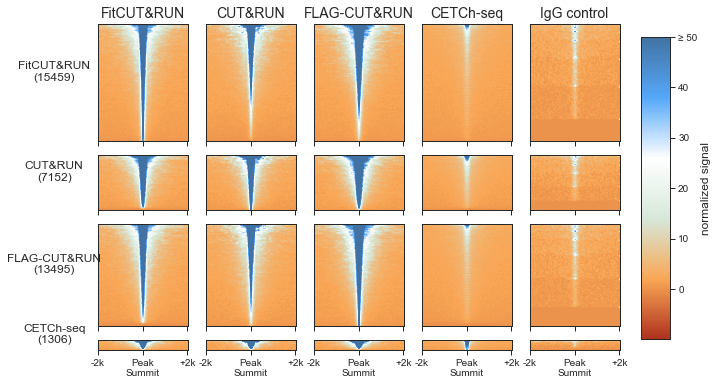

In [66]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, axes = plt.subplots(4,5,gridspec_kw={'width_ratios': [2,2,2,2,2], 'height_ratios': [15459,7152,13495,1306]}, 
                             figsize=[10,6], sharey = 'row', sharex = 'col')
    i = 0
    for K in heatmap_signal.keys() :
        if K == 'IgG_peak' :
            continue
        for k in heatmap_signal[K].keys() :
            df = heatmap_signal[K][k].assign(m=heatmap_signal[K][k].mean(axis=1)).sort_values('m', ascending=False).drop('m', axis=1)
            pos = axes[int(i/5), i%5].imshow(df, cmap=my_cmap, aspect='auto', vmax=50, vmin=-10, interpolation='gaussian')
            axes[int(i/5), i%5].yaxis.set_ticks_position('none') 
            axes[int(i/5), i%5].set_yticklabels([])
            axes[int(i/5), i%5].set_xticks([0,100,200])
            axes[int(i/5), i%5].set_xticklabels(['-2k', 'Peak\nSummit', '+2k'])
            if i < 5 :
                title = 'FLAG-CUT&RUN' if k.split(' v.s. ')[1][0:4] == 'Flag' else 'CETCh-seq' if k.split(' v.s. ')[1][0:4] == 'ChIP' else k.split(' v.s. ')[1]
                axes[int(i/5), i%5].set_title(title)
            if i%5 == 0 :    
                ylabel = 'FLAG-CUT&RUN' if k.split(' v.s. ')[0][0:4] == 'Flag' else 'CETCh-seq' if k.split(' v.s. ')[0][0:4] == 'ChIP' else k.split(' v.s. ')[0]
                axes[int(i/5), i%5].set_ylabel(ylabel + f'\n({str(df.shape[0])})', rotation = 0, labelpad=35)
                
            i += 1
            
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
#     fig.colorbar(pos, cax=cbar_ax)
    cbar = fig.colorbar(pos, cax=cbar_ax, extend='neither', ticks=[0, 10, 20, 30, 40, 50])
    cbar.set_label('normalized signal')
    cbar.ax.set_yticklabels(['0', '10', '20', '30', '40','≥ 50']) 

    
    fig.savefig('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/Supple_Fig2B_heatmap_signal_around_ATF1_peak.pdf', transparent=True)

### ELF1

#### FitCUT&RUN as peak

In [67]:
bw_scan = False

import subprocess

name = 'around_ELF1_FitCUTRUN_peak_signal'
capture_regions_file = 'ELF1_1e5_excludeIgG_filtered_summits.bed'
resolution = 20
span = 2000
capture_points = int(2 * span / resolution + 1)
xticks = np.arange(-span,span+resolution,resolution)
bigwig_files = [
    'ELF1_1e5.bw',
    'ELF1_wtCR_1e5.bw',
    'ELF1_FlagCR_1e5.bw',
    'ELF1_ChIP.bw',
    'IgG_public_GSE120011.bw',
]
labels = [
    'FitCUT&RUN v.s. FitCUT&RUN', 
    'FitCUT&RUN v.s. CUT&RUN', 
    'FitCUT&RUN v.s. Flag-CUT&RUN', 
    'FitCUT&RUN v.s. ChIP-seq', 
    'FitCUT&RUN v.s. IgG control',
] ### peak v.s. signal

cmd = f'''awk '{{print $1"\\t"$2-{span}-{resolution >> 1}"\\t"$3+{span}+{resolution >> 1}"\\t"$4"\\t"$5"\\t"$6}}' {capture_regions_file} > capture_regions.bed '''
print(subprocess.check_output(cmd, shell=True).decode(),end='')

capture_regions_file = 'capture_regions.bed'
bw_scan_cmd = f'/mnt/Storage/home/wangyiman/bin/utilities/getBigWigValue.py -n {name} -p 8 -s {capture_points} -m speed -b {capture_regions_file}'

for bigwig_file in bigwig_files:
    bw_scan_cmd += f' -w {bigwig_file}'
    
if bw_scan:
    print(subprocess.check_output(bw_scan_cmd.split()).decode(),end='')
    
def get_bigwig_mean(bw_file):
    import subprocess
    fold = subprocess.check_output(f'bigWigInfo {bw_file} | grep mean', shell=True).decode()
    fold = float(fold.split()[1])
    return fold

for index, (bigwig_file, label) in enumerate(zip(bigwig_files, labels)):
    mean = get_bigwig_mean(bigwig_file)
    heatmap_signal['_'.join(name.split('_')[2:4])][label] = pd.read_csv(f'signal_{name}_siteprof{index+1}.gz',sep='\t',header=None,index_col=None,names=xticks)/ mean
    
heatmap_signal['_'.join(name.split('_')[2:4])][labels[0]].head()

,-2000,-1980,-1960,-1940,-1920,-1900,-1880,-1860,-1840,-1820,...,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000
0,0.000000,0.000000,0.000000,3.393198,6.786389,5.089790,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,6.786389,4.750472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.678639,6.786389,6.786389,0.969486
2,0.000000,0.000000,0.000000,0.000000,0.000000,4.071835,6.786389,4.411153,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.000000,3.393198,6.786389,5.089790,0.000000,1.615810
3,0.000000,0.000000,3.732516,6.786389,5.089790,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,3.05388,13.572806,12.894169,1.017955,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,6.447071,0.0,0.00000,0.000000,0.000000,0.000000,3.732516,6.786389,7.465006,6.786389


#### CUT&RUN as peak

In [68]:
bw_scan = False

import subprocess

name = 'around_ELF1_CUTRUN_peak_signal'
capture_regions_file = 'ELF1_wtCR_1e5_excludeIgG_filtered_summits.bed'
resolution = 20
span = 2000
capture_points = int(2 * span / resolution + 1)
xticks = np.arange(-span,span+resolution,resolution)
bigwig_files = [
    'ELF1_1e5.bw',
    'ELF1_wtCR_1e5.bw',
    'ELF1_FlagCR_1e5.bw',
    'ELF1_ChIP.bw',
    'IgG_public_GSE120011.bw',
]
labels = [
    'CUT&RUN v.s. FitCUT&RUN', 
    'CUT&RUN v.s. CUT&RUN', 
    'CUT&RUN v.s. Flag-CUT&RUN', 
    'CUT&RUN v.s. ChIP-seq', 
    'CUT&RUN v.s. IgG control',
] ### peak v.s. signal

cmd = f'''awk '{{print $1"\\t"$2-{span}-{resolution >> 1}"\\t"$3+{span}+{resolution >> 1}"\\t"$4"\\t"$5"\\t"$6}}' {capture_regions_file} > capture_regions.bed '''
print(subprocess.check_output(cmd, shell=True).decode(),end='')

capture_regions_file = 'capture_regions.bed'
bw_scan_cmd = f'/mnt/Storage/home/wangyiman/bin/utilities/getBigWigValue.py -n {name} -p 8 -s {capture_points} -m speed -b {capture_regions_file}'

for bigwig_file in bigwig_files:
    bw_scan_cmd += f' -w {bigwig_file}'
    
if bw_scan:
    print(subprocess.check_output(bw_scan_cmd.split()).decode(),end='')
    
def get_bigwig_mean(bw_file):
    import subprocess
    fold = subprocess.check_output(f'bigWigInfo {bw_file} | grep mean', shell=True).decode()
    fold = float(fold.split()[1])
    return fold

for index, (bigwig_file, label) in enumerate(zip(bigwig_files, labels)):
    mean = get_bigwig_mean(bigwig_file)
    heatmap_signal['_'.join(name.split('_')[2:4])][label] = pd.read_csv(f'signal_{name}_siteprof{index+1}.gz',sep='\t',header=None,index_col=None,names=xticks)/ mean
    
heatmap_signal['_'.join(name.split('_')[2:4])][labels[0]].head()

,-2000,-1980,-1960,-1940,-1920,-1900,-1880,-1860,-1840,-1820,...,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000
0,0.000000,1.357281,6.786389,6.786389,0.339320,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.017955,6.786389,10.858258,20.698459,...,0.000000,0.000000,0.000000,3.053873,6.786389,5.429109,0.000000,0.0,0.0,0.0
2,0.000000,0.000000,1.017955,6.786389,6.786389,6.107752,6.786389,3.053873,0.000000,0.000000,...,8.482995,11.197543,20.359175,13.233453,1.017955,0.000000,0.000000,0.0,0.0,0.0
3,2.375236,0.000000,0.000000,0.000000,2.714554,6.786389,6.107752,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.429109,6.786389,3.053873,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.786389,5.768434,0.339320,6.786389,6.786389,1.357281,0.000000,0.0,0.0,0.0


#### Flag-CUT&RUN as peak

In [69]:
bw_scan = False

import subprocess

name = 'around_ELF1_Flag-CUTRUN_peak_signal'
capture_regions_file = 'ELF1_FlagCR_1e5_excludeIgG_filtered_summits.bed'
resolution = 20
span = 2000
capture_points = int(2 * span / resolution + 1)
xticks = np.arange(-span,span+resolution,resolution)
bigwig_files = [
    'ELF1_1e5.bw',
    'ELF1_wtCR_1e5.bw',
    'ELF1_FlagCR_1e5.bw',
    'ELF1_ChIP.bw',
    'IgG_public_GSE120011.bw',
]
labels = [
    'Flag-CUT&RUN v.s. FitCUT&RUN', 
    'Flag-CUT&RUN v.s. CUT&RUN', 
    'Flag-CUT&RUN v.s. Flag-CUT&RUN', 
    'Flag-CUT&RUN v.s. ChIP-seq', 
    'Flag-CUT&RUN v.s. IgG control',
] ### peak v.s. signal

cmd = f'''awk '{{print $1"\\t"$2-{span}-{resolution >> 1}"\\t"$3+{span}+{resolution >> 1}"\\t"$4"\\t"$5"\\t"$6}}' {capture_regions_file} > capture_regions.bed '''
print(subprocess.check_output(cmd, shell=True).decode(),end='')

capture_regions_file = 'capture_regions.bed'
bw_scan_cmd = f'/mnt/Storage/home/wangyiman/bin/utilities/getBigWigValue.py -n {name} -p 8 -s {capture_points} -m speed -b {capture_regions_file}'

for bigwig_file in bigwig_files:
    bw_scan_cmd += f' -w {bigwig_file}'
    
if bw_scan:
    print(subprocess.check_output(bw_scan_cmd.split()).decode(),end='')
    
def get_bigwig_mean(bw_file):
    import subprocess
    fold = subprocess.check_output(f'bigWigInfo {bw_file} | grep mean', shell=True).decode()
    fold = float(fold.split()[1])
    return fold

for index, (bigwig_file, label) in enumerate(zip(bigwig_files, labels)):
    mean = get_bigwig_mean(bigwig_file)
    heatmap_signal['_'.join(name.split('_')[2:4])][label] = pd.read_csv(f'signal_{name}_siteprof{index+1}.gz',sep='\t',header=None,index_col=None,names=xticks)/ mean
    
heatmap_signal['_'.join(name.split('_')[2:4])][labels[0]].head()

,-2000,-1980,-1960,-1940,-1920,-1900,-1880,-1860,-1840,-1820,...,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000
0,0.000000,0.000000,6.107752,6.786389,2.375236,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,5.768434,6.786389,3.053873,0.0,0.0,0.000000,...,7.125721,17.305275,20.359175,12.894169,1.357281,0.0,0.0,0.0,0.0,0.0
2,7.465006,6.786389,1.017955,0.000000,0.000000,0.000000,0.000000,0.0,0.0,6.447071,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


#### ChIP-seq as peak

In [70]:
bw_scan = False

import subprocess

name = 'around_ELF1_ChIP-seq_peak_signal'
capture_regions_file = 'ELF1_ChIP_filtered_summits.bed'
resolution = 20
span = 2000
capture_points = int(2 * span / resolution + 1)
xticks = np.arange(-span,span+resolution,resolution)
bigwig_files = [
    'ELF1_1e5.bw',
    'ELF1_wtCR_1e5.bw',
    'ELF1_FlagCR_1e5.bw',
    'ELF1_ChIP.bw',
    'IgG_public_GSE120011.bw',
]
labels = [
    'ChIP-seq v.s. FitCUT&RUN', 
    'ChIP-seq v.s. CUT&RUN', 
    'ChIP-seq v.s. Flag-CUT&RUN', 
    'ChIP-seq v.s. ChIP-seq', 
    'ChIP-seq v.s. IgG control',
] ### peak v.s. signal

cmd = f'''awk '{{print $1"\\t"$2-{span}-{resolution >> 1}"\\t"$3+{span}+{resolution >> 1}"\\t"$4"\\t"$5"\\t"$6}}' {capture_regions_file} > capture_regions.bed '''
print(subprocess.check_output(cmd, shell=True).decode(),end='')

capture_regions_file = 'capture_regions.bed'
bw_scan_cmd = f'/mnt/Storage/home/wangyiman/bin/utilities/getBigWigValue.py -n {name} -p 8 -s {capture_points} -m speed -b {capture_regions_file}'

for bigwig_file in bigwig_files:
    bw_scan_cmd += f' -w {bigwig_file}'
    
if bw_scan:
    print(subprocess.check_output(bw_scan_cmd.split()).decode(),end='')
    
def get_bigwig_mean(bw_file):
    import subprocess
    fold = subprocess.check_output(f'bigWigInfo {bw_file} | grep mean', shell=True).decode()
    fold = float(fold.split()[1])
    return fold

for index, (bigwig_file, label) in enumerate(zip(bigwig_files, labels)):
    mean = get_bigwig_mean(bigwig_file)
    heatmap_signal['_'.join(name.split('_')[2:4])][label] = pd.read_csv(f'signal_{name}_siteprof{index+1}.gz',sep='\t',header=None,index_col=None,names=xticks)/ mean
    
heatmap_signal['_'.join(name.split('_')[2:4])][labels[0]].head()

,-2000,-1980,-1960,-1940,-1920,-1900,-1880,-1860,-1840,-1820,...,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.000000,9.500984,13.572806,8.143711,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.768434,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,6.786389,6.786389,1.017955,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,4.411153,6.786389,3.877938
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4.750472,...,8.482995,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.201100


#### IgG as peak

In [71]:
bw_scan = False

import subprocess

name = 'around_ELF1_IgG_peak_signal'
capture_regions_file = 'IgG_public_GSE120011_filtered_summits.bed'
resolution = 20
span = 2000
capture_points = int(2 * span / resolution + 1)
xticks = np.arange(-span,span+resolution,resolution)
bigwig_files = [
    'ELF1_1e5.bw',
    'ELF1_wtCR_1e5.bw',
    'ELF1_FlagCR_1e5.bw',
    'ELF1_ChIP.bw',
    'IgG_public_GSE120011.bw',
]
labels = [
    'IgG control v.s. FitCUT&RUN', 
    'IgG control v.s. CUT&RUN', 
    'IgG control v.s. Flag-CUT&RUN', 
    'IgG control v.s. ChIP-seq', 
    'IgG control v.s. IgG control',
] ### peak v.s. signal

cmd = f'''awk '{{print $1"\\t"$2-{span}-{resolution >> 1}"\\t"$3+{span}+{resolution >> 1}"\\t"$4"\\t"$5"\\t"$6}}' {capture_regions_file} > capture_regions.bed '''
print(subprocess.check_output(cmd, shell=True).decode(),end='')

capture_regions_file = 'capture_regions.bed'
bw_scan_cmd = f'/mnt/Storage/home/wangyiman/bin/utilities/getBigWigValue.py -n {name} -p 8 -s {capture_points} -m speed -b {capture_regions_file}'

for bigwig_file in bigwig_files:
    bw_scan_cmd += f' -w {bigwig_file}'
    
if bw_scan:
    print(subprocess.check_output(bw_scan_cmd.split()).decode(),end='')
    
def get_bigwig_mean(bw_file):
    import subprocess
    fold = subprocess.check_output(f'bigWigInfo {bw_file} | grep mean', shell=True).decode()
    fold = float(fold.split()[1])
    return fold

for index, (bigwig_file, label) in enumerate(zip(bigwig_files, labels)):
    mean = get_bigwig_mean(bigwig_file)
    heatmap_signal['_'.join(name.split('_')[2:4])][label] = pd.read_csv(f'signal_{name}_siteprof{index+1}.gz',sep='\t',header=None,index_col=None,names=xticks)/ mean
    
heatmap_signal['_'.join(name.split('_')[2:4])][labels[0]].head()

,-2000,-1980,-1960,-1940,-1920,-1900,-1880,-1860,-1840,-1820,...,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000
0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,9.500984,13.572806,8.143711,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,6.107752,35.628538,40.039712,...,0.0,0.0,6.107752,6.786389,2.375236,0.0,0.0,0.0,0.0,0.0


#### heatmap -- Fig.S2A

In [48]:
%%bash
wc -l ELF1_1e5_excludeIgG_filtered_summits.bed
wc -l ELF1_wtCR_1e5_excludeIgG_filtered_summits.bed
wc -l ELF1_FlagCR_1e5_excludeIgG_filtered_summits.bed
wc -l ELF1_ChIP_filtered_summits.bed
wc -l IgG_public_GSE120011_filtered_summits.bed

17842 ELF1_1e5_excludeIgG_filtered_summits.bed
5267 ELF1_wtCR_1e5_excludeIgG_filtered_summits.bed
2211 ELF1_FlagCR_1e5_excludeIgG_filtered_summits.bed
5721 ELF1_ChIP_filtered_summits.bed
15 IgG_public_GSE120011_filtered_summits.bed


In [49]:
from colour import Color
from matplotlib.colors import LinearSegmentedColormap
def make_Ramp( ramp_colors ): 
    color_ramp = LinearSegmentedColormap.from_list( 'my_list', [ Color( c1 ).rgb for c1 in ramp_colors ] )
    plt.figure( figsize = (15,3))
    plt.imshow( [list(np.arange(0, len( ramp_colors ) , 0.1)) ] , interpolation='nearest', origin='lower', cmap= color_ramp )
    plt.xticks([])
    plt.yticks([])
    return color_ramp

In [50]:
my_cmap = make_Ramp(['#4173a3', '#56A8F9', '#FFFFFF', '#D6E8DA', '#F9A756', '#AE301F'][::-1]) # '#42596F'

In [24]:
heatmap_signal.keys()

dict_keys(['FitCUTRUN_peak', 'CUTRUN_peak', 'Flag-CUTRUN_peak', 'ChIP-seq_peak', 'IgG_peak'])

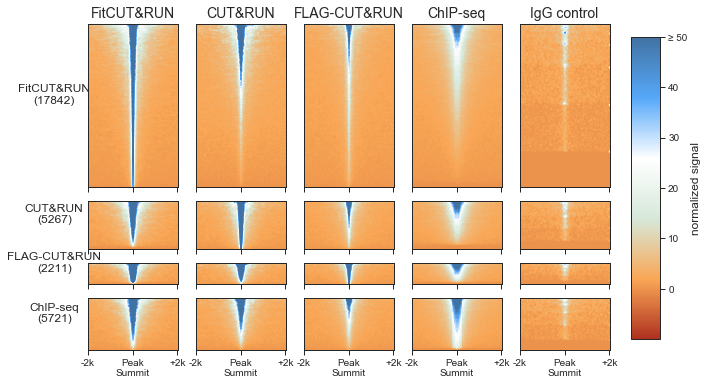

In [72]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, axes = plt.subplots(4,5,gridspec_kw={'width_ratios': [2,2,2,2,2], 'height_ratios': [17842,5267,2211,5721]}, 
                             figsize=[10,6], sharey = 'row', sharex='col')
    i = 0
    for K in heatmap_signal.keys() :
        if K == 'IgG_peak' :
            continue
        for k in heatmap_signal[K].keys() :
            df = heatmap_signal[K][k].assign(m=heatmap_signal[K][k].mean(axis=1)).sort_values('m', ascending=False).drop('m', axis=1)
            pos = axes[int(i/5), i%5].imshow(df, cmap=my_cmap, aspect='auto', vmax=50, vmin=-10, interpolation='gaussian')
            axes[int(i/5), i%5].yaxis.set_ticks_position('none') 
            axes[int(i/5), i%5].set_yticklabels([])
            axes[int(i/5), i%5].set_xticks([0,100,200])
            axes[int(i/5), i%5].set_xticklabels(['-2k', 'Peak\nSummit', '+2k'])
            if i < 5 :
                title = k.split(' v.s. ')[1] if k.split(' v.s. ')[1][0:4] != 'Flag' else 'FLAG-CUT&RUN'
                axes[int(i/5), i%5].set_title(title)
            if i%5 == 0 :    
                ylabel = k.split(' v.s. ')[0] if k.split(' v.s. ')[0][0:4] != 'Flag' else 'FLAG-CUT&RUN'
                axes[int(i/5), i%5].set_ylabel(ylabel + f'\n({str(df.shape[0])})', rotation = 0, labelpad=25)
            i += 1
            
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
#     fig.colorbar(pos, cax=cbar_ax)
    cbar = fig.colorbar(pos, cax=cbar_ax, extend='neither', ticks=[0, 10, 20, 30, 40, 50])
    cbar.set_label('normalized signal')
    cbar.ax.set_yticklabels(['0', '10', '20', '30', '40','≥ 50']) 

    fig.savefig('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/Supple_Fig2A_heatmap_signal_around_ELF1_peak.pdf', transparent=True)